# **Importing the necessary packages**



In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc, f1_score, recall_score, precision_score
from matplotlib import pyplot
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings("ignore")

# **Loading the Dataset**

In [9]:
dataframe=pd.read_csv("shoesseodataset.csv")
dataframe.head(5)

,Keyword,Search_Volume,Total_Results,BSR_Min,BSR_Avg,BSR_Max,Price_Min,Price_Avg,Price_Max,Reviews_Min,Reviews_Avg,Reviews_Max,Sales_Min,Sales_Avg,Sales_Max,Revenue_Min,Revenue_Avg,Revenue_Max,Revenue_Total,Oppurtunity_Score,Use
0,11children shoes office shoes,0.0,272.0,1456.0,22576.0,62712.0,379.0,577.0,799.0,0,3,19,1.0,8.0,30.0,599.0,4087.0,12784.0,40873.0,0,NO
1,361 shoes white shoes,0.0,230.0,65120.0,65120.0,65120.0,1764.0,1764.0,1764.0,0,0,0,1.0,1.0,1.0,1764.0,1764.0,1764.0,17640.0,1,YES
2,a6 shoes running shoes white colour,0.0,2.0,7.0,84810.0,438890.0,299.0,741.0,1299.0,0,414,2878,0.0,91.0,336.0,0.0,80637.0,334656.0,645094.0,6,YES
3,aces shoes running shoes,0.0,50.0,663.0,65085.0,335402.0,454.0,1307.0,2799.0,0,51,249,0.0,10.0,50.0,0.0,12526.0,61578.0,112731.0,2,NO
4,action shoes for men shoes,0.0,739.0,903.0,5301.0,11836.0,559.0,720.0,1299.0,0,35,216,5.0,15.0,41.0,2995.0,11178.0,24559.0,100600.0,3,YES


# **Exploratory Data Analysis with Correlation Heatmap**

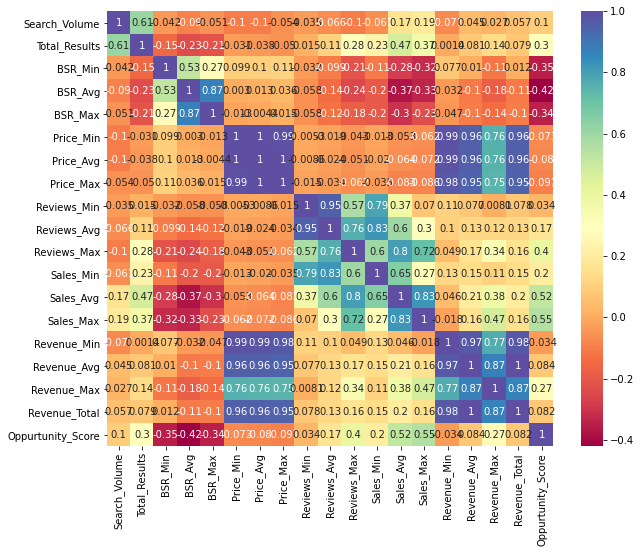

In [10]:
fig,axes = plt.subplots(figsize=(10,8))
correl = dataframe.corr()
sns.heatmap(dataframe.corr(),cmap='Spectral',annot=True,ax=axes)
x = dataframe.drop(columns=['Oppurtunity_Score']).values
y = dataframe['Oppurtunity_Score'].values
plt.show()

# **Data Preprocessing**

In [11]:
dataframe.drop(dataframe.columns[[1,2,3,5,6,8,9,11,12,14,15,17,18]], axis = 1, inplace = True) 
dataframe['BSR_Avg'].fillna(value=dataframe['BSR_Avg'].mean(), inplace=True)
dataframe['Price_Avg'].fillna(value=dataframe['Price_Avg'].mean(), inplace=True)
dataframe['Reviews_Avg'].fillna(value=dataframe['Reviews_Avg'].mean(), inplace=True)
dataframe['Sales_Avg'].fillna(value=dataframe['Sales_Avg'].mean(), inplace=True)
dataframe['Revenue_Avg'].fillna(value=dataframe['Revenue_Avg'].mean(), inplace=True)
dataframe.head(5)

,Keyword,BSR_Avg,Price_Avg,Reviews_Avg,Sales_Avg,Revenue_Avg,Oppurtunity_Score,Use
0,11children shoes office shoes,22576.0,577.0,3,8.0,4087.0,0,NO
1,361 shoes white shoes,65120.0,1764.0,0,1.0,1764.0,1,YES
2,a6 shoes running shoes white colour,84810.0,741.0,414,91.0,80637.0,6,YES
3,aces shoes running shoes,65085.0,1307.0,51,10.0,12526.0,2,NO
4,action shoes for men shoes,5301.0,720.0,35,15.0,11178.0,3,YES


# **Correlation Heatmap of Processed Data**

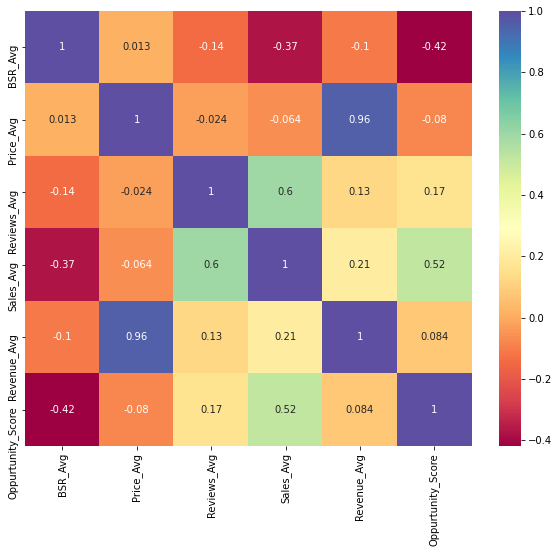

In [12]:
fig,axes = plt.subplots(figsize=(10,8))
correl = dataframe.corr()
sns.heatmap(dataframe.corr(),cmap='Spectral',annot=True,ax=axes)
x = dataframe.drop(columns=['Oppurtunity_Score']).values
y = dataframe['Oppurtunity_Score'].values
plt.show()

# **Countplot of Decisions - YES or NO**


			COUNTPLOT	


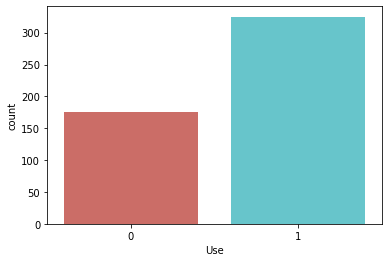


NUMBER OF YES AND NO
1    325
0    175
Name: Use, dtype: int64


In [17]:
dataframe=dataframe.replace(to_replace ="NO", value =0)
dataframe=dataframe.replace(to_replace ="YES", value =1)
print("\n\t\t\tCOUNTPLOT\t")
sns.countplot(x="Use",data=dataframe,palette="hls")
plt.show()
print("\nNUMBER OF YES AND NO")
print(dataframe["Use"].value_counts())

# **Relationship between BSR_Avg and Oppurtunity_Score**

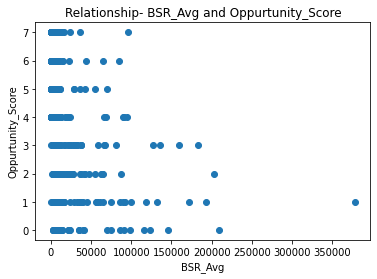

In [18]:
pyplot.scatter(dataframe.BSR_Avg, dataframe.Oppurtunity_Score)
pyplot.title("Relationship- BSR_Avg and Oppurtunity_Score")
pyplot.xlabel("BSR_Avg")
pyplot.ylabel("Oppurtunity_Score")
pyplot.show()

# **Relationship between Revenue_Avg and Price_Avg**

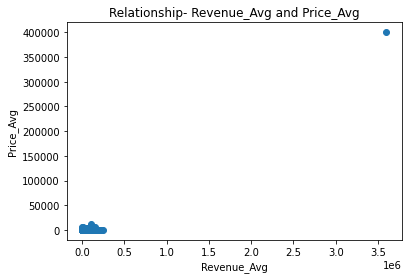

In [20]:
pyplot.scatter(dataframe.Revenue_Avg, dataframe.Price_Avg)
pyplot.title("Relationship- Revenue_Avg and Price_Avg")
pyplot.xlabel("Revenue_Avg")
pyplot.ylabel("Price_Avg")
pyplot.show()

# **Relationship between Sales_Avg and BSR_Avg**

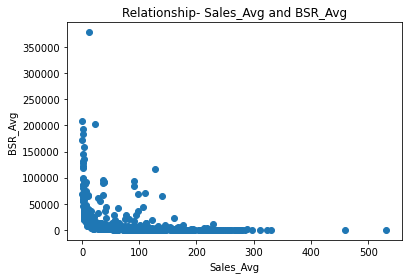

In [21]:
pyplot.scatter(dataframe.Sales_Avg, dataframe.BSR_Avg)
pyplot.title("Relationship- Sales_Avg and BSR_Avg")
pyplot.xlabel("Sales_Avg")
pyplot.ylabel("BSR_Avg")
pyplot.show()

# **Relationship between Sales_Avg and Oppurtunity_Score**

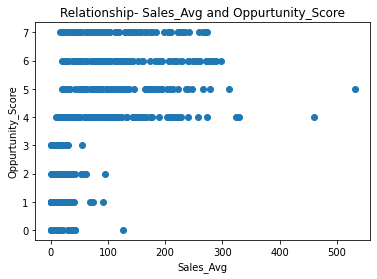

In [22]:
pyplot.scatter(dataframe.Sales_Avg, dataframe.Oppurtunity_Score)
pyplot.title("Relationship- Sales_Avg and Oppurtunity_Score")
pyplot.xlabel("Sales_Avg")
pyplot.ylabel("Oppurtunity_Score")
pyplot.show()

# **Splitting Training and Test Data**

In [23]:
X = dataframe.iloc[:,1:-1 ].values
y = dataframe.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 19,stratify=y)

# **K - NEAREST NEIGHBOUR MODEL**

In [28]:
#Checking for neighbours in KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train, y_train)
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

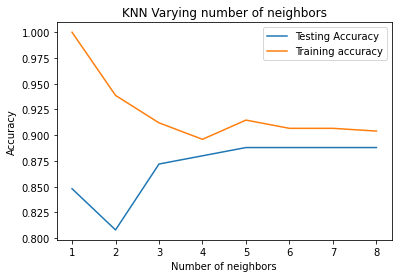

In [29]:
#KNN GRAPH
plt.title('KNN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [30]:
#KNN MODEL
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
y_pred = classifier.predict(X_test)
yp = (np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,classification_report
knnacc = accuracy_score(y_test, y_pred)*100
print('Classification Report\n\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix\n', confusion_matrix(y_test, y_pred))
print('\nModel Accuracy:', accuracy_score(y_test, y_pred)*100)
print("Training data Accuracy:", knn.score(X_train, y_train)*100)
print("Testing data Accuracy:", knn.score(X_test, y_test)*100)

Classification Report

               precision    recall  f1-score   support

           0       0.89      0.77      0.83        44
           1       0.89      0.95      0.92        81

    accuracy                           0.89       125
   macro avg       0.89      0.86      0.87       125
weighted avg       0.89      0.89      0.89       125


Confusion Matrix
 [[34 10]
 [ 4 77]]

Model Accuracy: 88.8
Training data Accuracy: 90.66666666666666
Testing data Accuracy: 88.8


In [31]:
#OPTIMIZING KNN MODEL (HYPER PARAMETER TUNING USING RANDOMIZED SEARCH CROSS VALIDATION)
knn = KNeighborsClassifier()
params = {'n_neighbors':np.arange(2,11,step=1),'metric':['minkowski','manhattan','euclidean']}
random_search = RandomizedSearchCV(knn,params,scoring='precision',cv=10)
precision_average = precision_score(y_test, y_pred, average="weighted", pos_label=1)
recall_average = recall_score(y_test, y_pred, average="weighted", pos_label=1)
f1_score_average = f1_score(y_test,y_pred,average="weighted",pos_label=1)
random_search.fit(X_train,y_train)
print("RANDOM SEARCH RESULTS \n")
print("Best Params : ",random_search.best_params_)
print("Best Precision : ",precision_average)
print("Best Recall : ", recall_average)
print("Best f1_score : ",f1_score_average)
print("Best Model: \n",random_search.best_estimator_)
tuned_model = random_search.best_estimator_

RANDOM SEARCH RESULTS 

Best Params :  {'n_neighbors': 2, 'metric': 'minkowski'}
Best Precision :  0.8884646098003629
Best Recall :  0.888
Best f1_score :  0.8859024390243904
Best Model: 
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')


# **LOGISTIC REGRESSION MODEL**

In [32]:
import statsmodels.api as sm
import pandas.util.testing as tm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 19,stratify=y)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(solver='liblinear', random_state=24) 
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred = classifier.predict(X_test)
yp = (np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,classification_report
lgacc = accuracy_score(y_test, y_pred)*100
print('\n\nClassification Report\n\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix\n', confusion_matrix(y_test, y_pred))
print('\nModel Accuracy:', accuracy_score(y_test, y_pred)*100)
print("Training data Accuracy:", classifier.score(X_train, y_train)*100)
print("Testing data Accuracy:", classifier.score(X_test, y_test)*100)

Optimization terminated successfully.
         Current function value: 0.312308
         Iterations 9


Classification Report

               precision    recall  f1-score   support

           0       0.84      0.59      0.69        44
           1       0.81      0.94      0.87        81

    accuracy                           0.82       125
   macro avg       0.82      0.76      0.78       125
weighted avg       0.82      0.82      0.81       125


Confusion Matrix
 [[26 18]
 [ 5 76]]

Model Accuracy: 81.6
Training data Accuracy: 85.33333333333334
Testing data Accuracy: 81.6


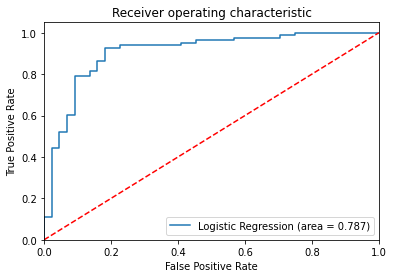

In [33]:
#ROC_AUC_GRAPH FOR LINEAR REGRESSION MODEL
import sklearn.linear_model as sk
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logreg = sk.LogisticRegressionCV()
logreg.fit(X_train,y_train)
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [34]:
#OPTIMIZING LOGISTIC REGRESSION MODEL
logistic_reg = LogisticRegression(solver='liblinear', random_state=19)
precision_average = precision_score(y_test, y_pred, average="weighted", pos_label=1)
recall_average = recall_score(y_test, y_pred, average="weighted", pos_label=1)
f1_score_average = f1_score(y_test,y_pred,average="weighted",pos_label=1)
print("CLASSIFICATION REPORT OPTIMIZATION RESULTS \n")
print("Best Precision : ",precision_average)
print("Best Recall : ", recall_average)
print("Best f1_score : ",f1_score_average)

CLASSIFICATION REPORT OPTIMIZATION RESULTS 

Best Precision :  0.8191407000686342
Best Recall :  0.816
Best f1_score :  0.806887619047619


# **NAIVE BAYES CLASSIFIER MODEL**

In [35]:
#NAIVE BAYES CLASSIFIER MODEL
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train);
y_pred = classifier.predict(X_test)
yp = (np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,classification_report
nbacc = accuracy_score(y_test, y_pred)*100
print('Classification Report\n\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix\n', confusion_matrix(y_test, y_pred))
print('\nModel Accuracy:', accuracy_score(y_test, y_pred)*100)
print("Training data Accuracy:", classifier.score(X_train, y_train)*100)
print("Testing data Accuracy:", classifier.score(X_test, y_test)*100)

Classification Report

               precision    recall  f1-score   support

           0       0.79      0.84      0.81        44
           1       0.91      0.88      0.89        81

    accuracy                           0.86       125
   macro avg       0.85      0.86      0.85       125
weighted avg       0.87      0.86      0.86       125


Confusion Matrix
 [[37  7]
 [10 71]]

Model Accuracy: 86.4
Training data Accuracy: 87.2
Testing data Accuracy: 86.4


In [36]:
#OPTIMIZING NAIVE BAYES CLASSIFIER MODEL
precision_average = precision_score(y_test, y_pred, average="weighted", pos_label=1)
recall_average = recall_score(y_test, y_pred, average="weighted", pos_label=1)
f1_score_average = f1_score(y_test,y_pred,average="weighted",pos_label=1)
print("CLASSIFICATION REPORT OPTIMIZATION RESULTS \n")
print("Best Precision : ",precision_average)
print("Best Recall : ", recall_average)
print("Best f1_score : ",f1_score_average)

CLASSIFICATION REPORT OPTIMIZATION RESULTS 

Best Precision :  0.8669525368248772
Best Recall :  0.864
Best f1_score :  0.8649587393738338


# **DECISION TREE CLASSIFIER MODEL**

In [38]:
#DECISION TREE CLASSIFIER MODEL
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 19)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,classification_report
dtacc = accuracy_score(y_test, y_pred)*100
print('Classification Report\n\n', classification_report(y_test, y_pred))
print('\n\nConfusion Matrix\n', confusion_matrix(y_test, y_pred))
print('\nModel Accuracy:', accuracy_score(y_test, y_pred)*100)
print("Training data Accuracy:", classifier.score(X_train, y_train)*100)
print("Testing data Accuracy:", classifier.score(X_test, y_test)*100)

Classification Report

               precision    recall  f1-score   support

           0       0.85      0.77      0.81        44
           1       0.88      0.93      0.90        81

    accuracy                           0.87       125
   macro avg       0.87      0.85      0.86       125
weighted avg       0.87      0.87      0.87       125



Confusion Matrix
 [[34 10]
 [ 6 75]]

Model Accuracy: 87.2
Training data Accuracy: 100.0
Testing data Accuracy: 87.2


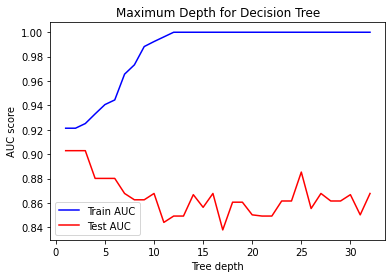

In [39]:
#ROC-AUC GRAPH FOR DECISION TREE CLASSIFIER MODEL
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
  dt = DecisionTreeClassifier(max_depth=max_depth)
  dt.fit(X_train, y_train)
  train_pred = dt.predict(X_train)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  # Add auc score to previous train results
  train_results.append(roc_auc)
  y_pred = dt.predict(X_test)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  # Add auc score to previous test results
  test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1 = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2 = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.title("Maximum Depth for Decision Tree")
plt.legend()
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [40]:
#OPTIMIZING DECISION TREE CLASSIFIER MODEL
precision_average = precision_score(y_test, y_pred, average="weighted", pos_label=1)
recall_average = recall_score(y_test, y_pred, average="weighted", pos_label=1)
f1_score_average = f1_score(y_test,y_pred,average="weighted",pos_label=1)
print("CLASSIFICATION REPORT OPTIMIZATION RESULTS \n")
print("Best Precision : ",precision_average)
print("Best Recall : ", recall_average)
print("Best f1_score : ",f1_score_average)

CLASSIFICATION REPORT OPTIMIZATION RESULTS 

Best Precision :  0.8978230958230958
Best Recall :  0.896
Best f1_score :  0.8936600189933522


# **RANDOM FOREST CLASSIFIER MODEL**

In [41]:
#RANDOM FOREST CLASSIFIER MODEL
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'gini', random_state = 19)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,classification_report
rfacc = accuracy_score(y_test, y_pred)*100
print('Classification Report\n\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix\n', confusion_matrix(y_test, y_pred))
print('\nModel Accuracy', accuracy_score(y_test, y_pred)*100)
print("Training Accuracy", classifier.score(X_train, y_train)*100)
print("Testing Accuracy", classifier.score(X_test, y_test)*100)

Classification Report

               precision    recall  f1-score   support

           0       0.95      0.82      0.88        44
           1       0.91      0.98      0.94        81

    accuracy                           0.92       125
   macro avg       0.93      0.90      0.91       125
weighted avg       0.92      0.92      0.92       125


Confusion Matrix
 [[36  8]
 [ 2 79]]

Model Accuracy 92.0
Training Accuracy 98.4
Testing Accuracy 92.0


In [42]:
#OPTIMIZING RANDOM FOREST CLASSIFIER MODEL
precision_average = precision_score(y_test, y_pred, average="weighted", pos_label=1)
recall_average = recall_score(y_test, y_pred, average="weighted", pos_label=1)
f1_score_average = f1_score(y_test,y_pred,average="weighted",pos_label=1)
print("CLASSIFICATION REPORT OPTIMIZATION RESULTS \n")
print("Best Precision : ",precision_average)
print("Best Recall : ", recall_average)
print("Best f1_score : ",f1_score_average)

CLASSIFICATION REPORT OPTIMIZATION RESULTS 

Best Precision :  0.9218874773139746
Best Recall :  0.92
Best f1_score :  0.9185017421602788


# **SUPPORT VECTOR MACHINES MODEL**

In [43]:
#SUPPORT VECTOR MACHINES MODEL
from sklearn import svm
classifier=svm.SVC()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,classification_report
svmacc = accuracy_score(y_test, y_pred)*100
print('Classification Report\n\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix\n', confusion_matrix(y_test, y_pred))
print('\nModel Accuracy', accuracy_score(y_test, y_pred)*100)
print("Training Accuracy", classifier.score(X_train, y_train)*100)
print("Testing Accuracy", classifier.score(X_test, y_test)*100)

Classification Report

               precision    recall  f1-score   support

           0       0.90      0.80      0.84        44
           1       0.90      0.95      0.92        81

    accuracy                           0.90       125
   macro avg       0.90      0.87      0.88       125
weighted avg       0.90      0.90      0.89       125


Confusion Matrix
 [[35  9]
 [ 4 77]]

Model Accuracy 89.60000000000001
Training Accuracy 89.06666666666668
Testing Accuracy 89.60000000000001


In [44]:
#OPTIMIZING SUPPORT VECTOR MACHINES MODEL
precision_average = precision_score(y_test, y_pred, average="weighted", pos_label=1)
recall_average = recall_score(y_test, y_pred, average="weighted", pos_label=1)
f1_score_average = f1_score(y_test,y_pred,average="weighted",pos_label=1)
print("CLASSIFICATION REPORT OPTIMIZATION RESULTS \n")
print("Best Precision : ",precision_average)
print("Best Recall : ", recall_average)
print("Best f1_score : ",f1_score_average)

CLASSIFICATION REPORT OPTIMIZATION RESULTS 

Best Precision :  0.8960834824090639
Best Recall :  0.896
Best f1_score :  0.894424356107063


# **Comparing all the models**

The accuracy score achieved with KNN is: 88.8 %
The accuracy score achieved with Logistic Regression is: 81.6 %
The accuracy score achieved with Naive Bayes is: 86.4 %
The accuracy score achieved with Decision Tree is: 87.2 %
The accuracy score achieved with Random Forest is: 92.0 %
The accuracy score achieved with SVM is: 89.60000000000001 %


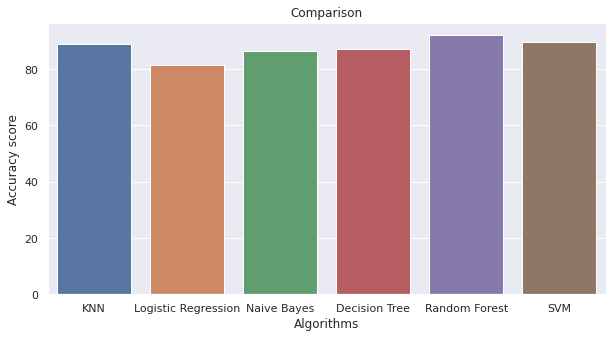

In [48]:
scores = [knnacc,lgacc,nbacc,dtacc,rfacc,svmacc]
algorithms = ["KNN","Logistic Regression","Naive Bayes","Decision Tree","Random Forest","SVM"]
for i in range(len(algorithms)):
    print("The accuracy score achieved with "+algorithms[i]+" is: "+str(scores[i])+" %")
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Comparison")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(algorithms,scores)